In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
img_width=256; img_height=256
batch_size=8

In [3]:
TRAINING_DIR = 'Kaggle_MRI_Tumor/Training'

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True
                                   )

In [4]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width)
                                                    )

Found 2870 images belonging to 4 classes.


In [5]:
VALIDATION_DIR = 'Kaggle_MRI_Tumor/Testing'

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [6]:
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 394 images belonging to 4 classes.


### Increased the output layers to 3 with Dropout at 0.2

In [36]:
callbacks = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')
best_model_file = '.../resnet50_drop_batch_best_weights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [37]:
#  wp = '.../weather_pred/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet50_base = ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height, img_width,3))

In [38]:
print('Adding new layers...')
output = resnet50_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(4, activation='softmax')(output)
print('New layers added!')

Adding new layers...
New layers added!


In [39]:
resnet50_model = Model(resnet50_base.input, output)
for layer in resnet50_model.layers[:-7]:
    layer.trainable = False

resnet50_model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

__________________________________________________________________________________________________


In [40]:
resnet50_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [41]:
history = resnet50_model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [callbacks, best_model]
                              )

Epoch 1/30
359/359 [==============================] - 623s 2s/step - loss: 1.4296 - accuracy: 0.5056 - val_loss: 1.8764 - val_accuracy: 0.4365
Epoch 2/30
359/359 [==============================] - 524s 1s/step - loss: 1.0129 - accuracy: 0.6108 - val_loss: 1.8272 - val_accuracy: 0.4543
Epoch 3/30
359/359 [==============================] - 616s 2s/step - loss: 0.9251 - accuracy: 0.6199 - val_loss: 1.2494 - val_accuracy: 0.5228
Epoch 4/30
359/359 [==============================] - 700s 2s/step - loss: 0.8643 - accuracy: 0.6523 - val_loss: 1.5470 - val_accuracy: 0.4670
Epoch 5/30
359/359 [==============================] - 553s 2s/step - loss: 0.8366 - accuracy: 0.6526 - val_loss: 1.6259 - val_accuracy: 0.4695
Epoch 6/30
359/359 [==============================] - 605s 2s/step - loss: 0.8081 - accuracy: 0.6847 - val_loss: 1.3516 - val_accuracy: 0.4975
Epoch 7/30
359/359 [==============================] - 572s 2s/step - loss: 0.8146 - accuracy: 0.6735 - val_loss: 1.3823 - val_accuracy: 0.5000

In [42]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

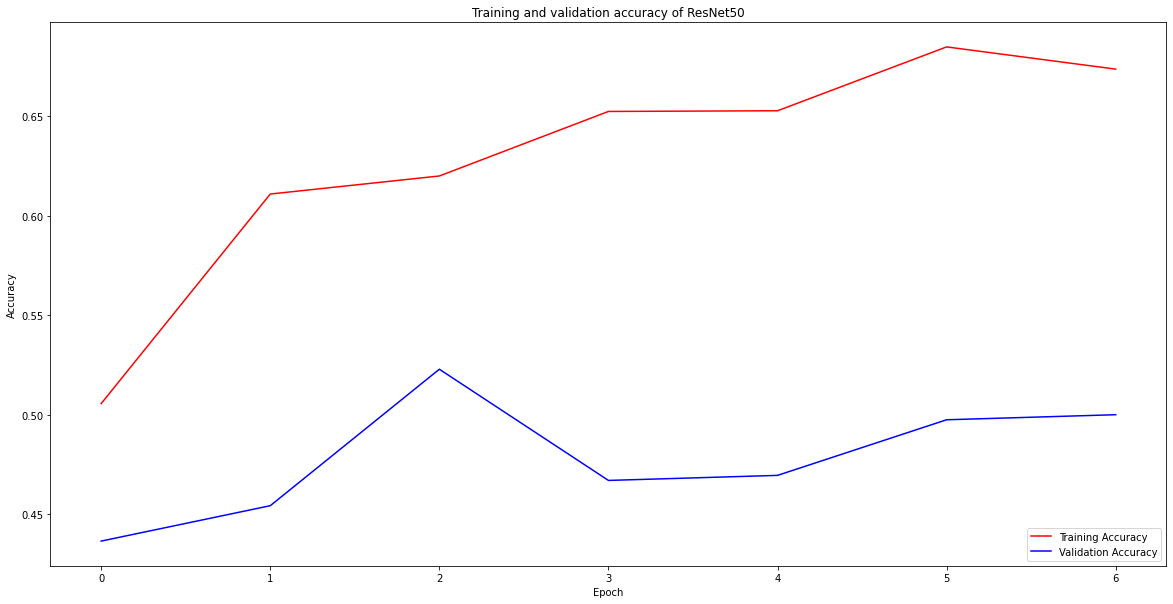

In [43]:
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy of ResNet50')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss of ResNet50')

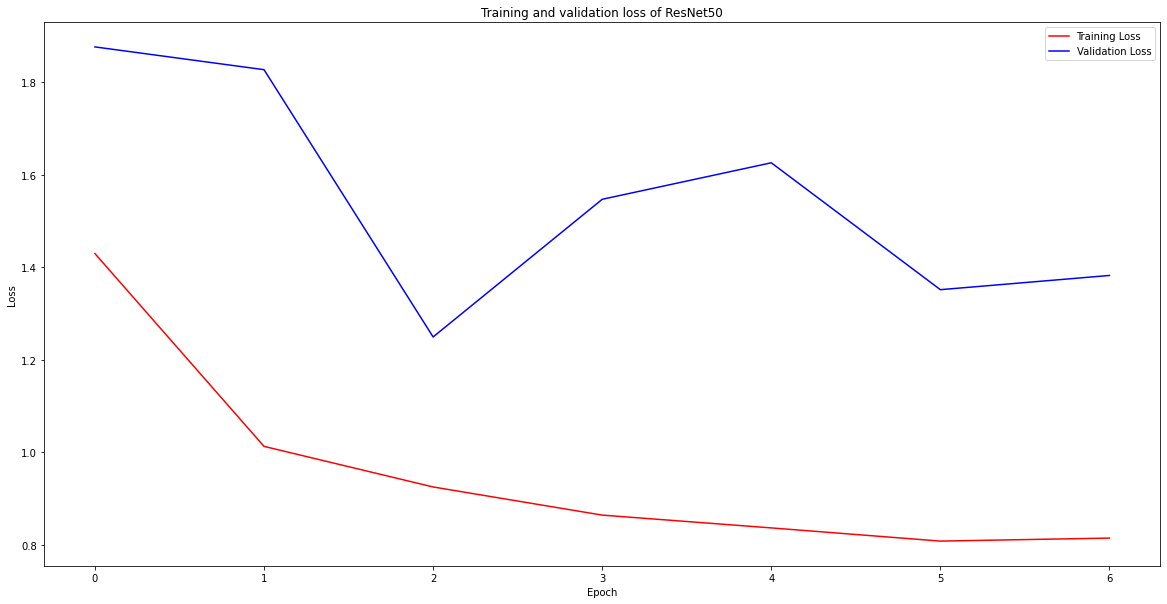

In [44]:
fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss of ResNet50')

### Dropout is increased to 0.3 with only two additional output layers

In [45]:
callbacks = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')
best_model_file = '.../resnet50_drop_batch_best_weights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [46]:
#  wp = '.../weather_pred/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet50_base = ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height, img_width,3))

In [47]:
print('Adding new layers...')
output = resnet50_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.3)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.3)(output)
output = Dense(4, activation='softmax')(output)
print('New layers added!')

Adding new layers...
New layers added!


In [48]:
resnet50_model = Model(resnet50_base.input, output)
for layer in resnet50_model.layers[:-7]:
    layer.trainable = False

# resnet50_model.summary()


In [49]:
resnet50_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [50]:
history = resnet50_model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [callbacks, best_model]
                              )

Epoch 1/30
359/359 [==============================] - 714s 2s/step - loss: 1.1616 - accuracy: 0.6035 - val_loss: 1.6118 - val_accuracy: 0.5533
Epoch 2/30
359/359 [==============================] - 696s 2s/step - loss: 0.7283 - accuracy: 0.7408 - val_loss: 1.5779 - val_accuracy: 0.5990
Epoch 3/30
359/359 [==============================] - 739s 2s/step - loss: 0.6087 - accuracy: 0.7742 - val_loss: 1.4648 - val_accuracy: 0.6218
Epoch 4/30
359/359 [==============================] - 677s 2s/step - loss: 0.5330 - accuracy: 0.8073 - val_loss: 1.3471 - val_accuracy: 0.6244
Epoch 5/30
359/359 [==============================] - 695s 2s/step - loss: 0.4902 - accuracy: 0.8153 - val_loss: 1.0563 - val_accuracy: 0.6726
Epoch 6/30
359/359 [==============================] - 709s 2s/step - loss: 0.4657 - accuracy: 0.8261 - val_loss: 1.0720 - val_accuracy: 0.6954
Epoch 7/30
359/359 [==============================] - 687s 2s/step - loss: 0.4441 - accuracy: 0.8296 - val_loss: 1.3645 - val_accuracy: 0.6142

In [51]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

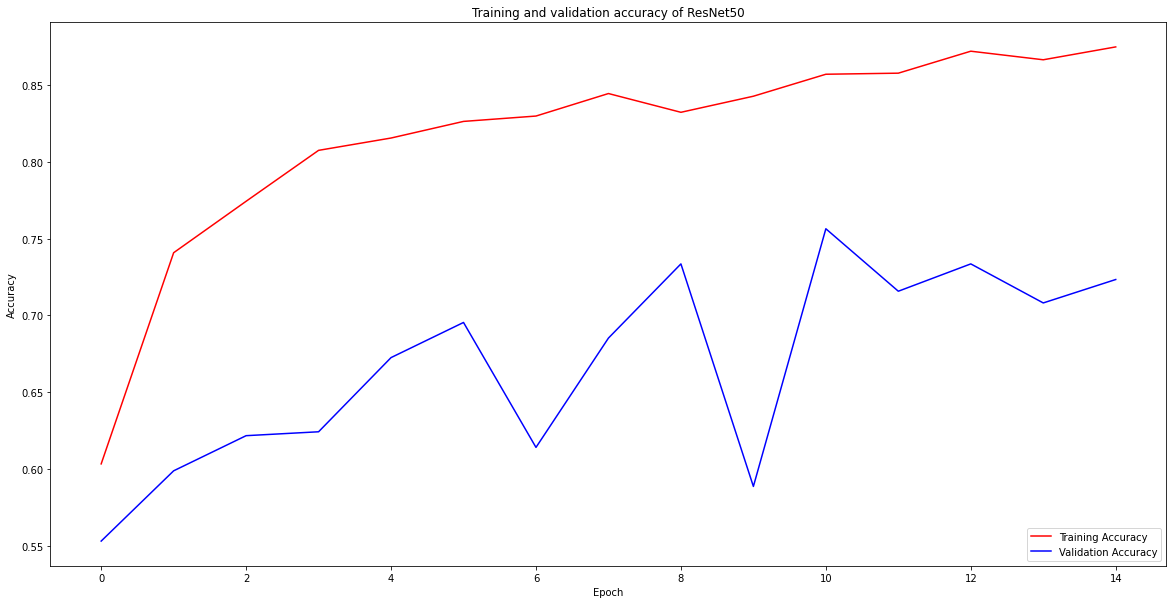

In [52]:
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy of ResNet50')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss of ResNet50')

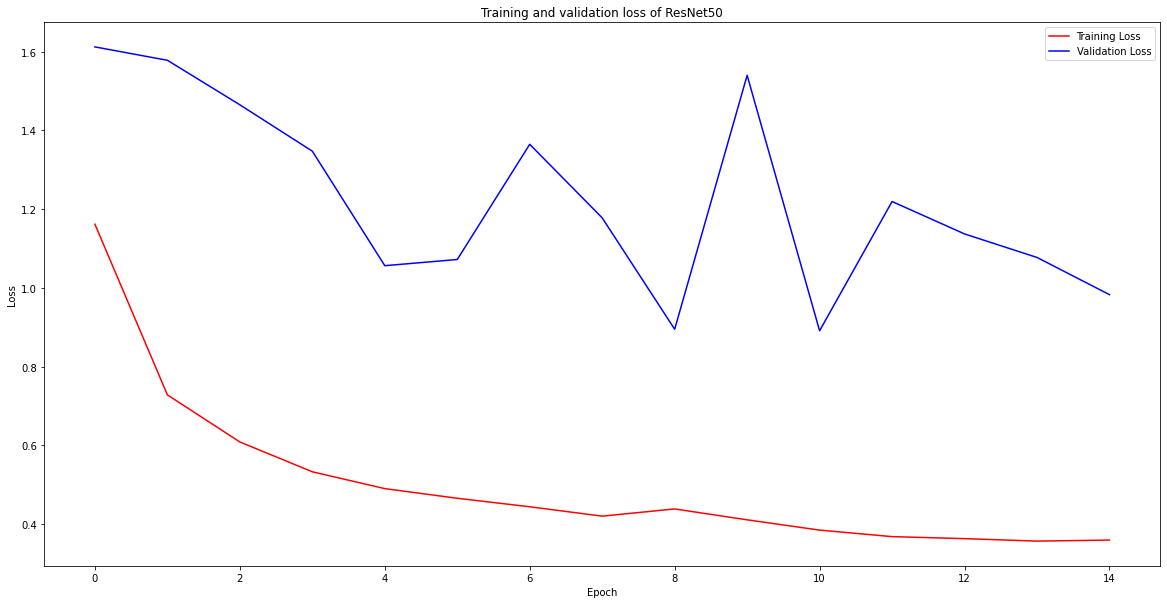

In [53]:
fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss of ResNet50')

### Dropout increased to 0.5  in external layers

In [8]:
callbacks = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')
best_model_file = '.../resnet50_drop_batch_best_weights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [9]:
#  wp = '.../weather_pred/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet50_base = ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height, img_width,3))

In [10]:
print('Adding new layers...')
output = resnet50_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(4, activation='softmax')(output)
print('New layers added!')

Adding new layers...
New layers added!


In [11]:
resnet50_model = Model(resnet50_base.input, output)
for layer in resnet50_model.layers[:-7]:
    layer.trainable = False

In [12]:
resnet50_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [13]:
history = resnet50_model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [callbacks, best_model]
                              )

Epoch 1/30
359/359 [==============================] - 631s 2s/step - loss: 1.2319 - accuracy: 0.6080 - val_loss: 2.0237 - val_accuracy: 0.5736
Epoch 2/30
359/359 [==============================] - 587s 2s/step - loss: 0.8553 - accuracy: 0.6993 - val_loss: 4.4554 - val_accuracy: 0.6345
Epoch 3/30
359/359 [==============================] - 603s 2s/step - loss: 0.6995 - accuracy: 0.7498 - val_loss: 3.0066 - val_accuracy: 0.5888
Epoch 4/30
359/359 [==============================] - 772s 2s/step - loss: 0.6292 - accuracy: 0.7652 - val_loss: 1.9604 - val_accuracy: 0.6726
Epoch 5/30
359/359 [==============================] - 788s 2s/step - loss: 0.5763 - accuracy: 0.7812 - val_loss: 1.1220 - val_accuracy: 0.6726
Epoch 6/30
359/359 [==============================] - 718s 2s/step - loss: 0.5256 - accuracy: 0.8052 - val_loss: 1.0190 - val_accuracy: 0.6751
Epoch 7/30
359/359 [==============================] - 725s 2s/step - loss: 0.5055 - accuracy: 0.8105 - val_loss: 1.0895 - val_accuracy: 0.6929

In [14]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

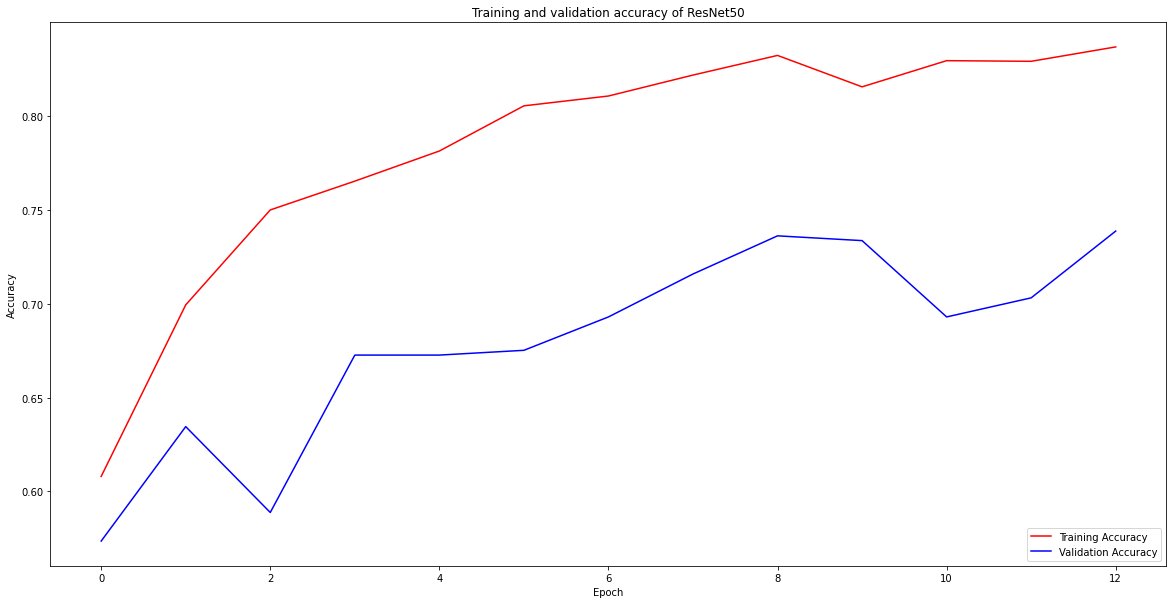

In [15]:
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy of ResNet50')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss of ResNet50')

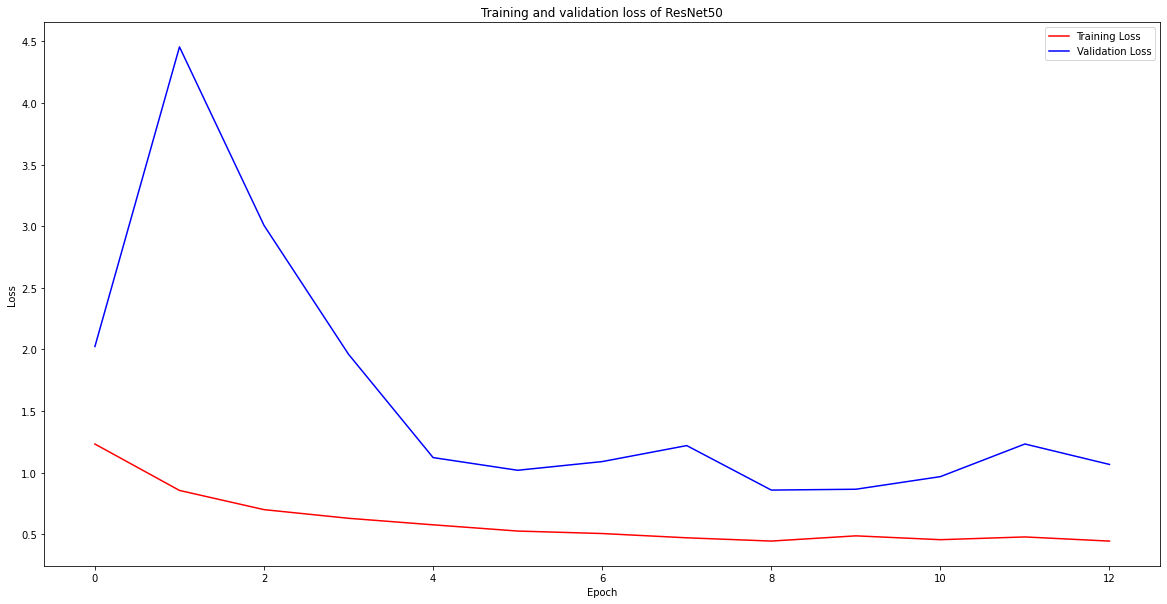

In [16]:
fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss of ResNet50')

### 1 out put layer with dropout at 0.2

In [7]:
callbacks = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='auto')
best_model_file = '.../resnet50_drop_batch_best_weights_256.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [8]:
#  wp = '.../weather_pred/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet50_base = ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height, img_width,3))

In [9]:
print('Adding new layers...')
output = resnet50_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(4, activation='softmax')(output)
print('New layers added!')

Adding new layers...
New layers added!


In [10]:
resnet50_model = Model(resnet50_base.input, output)
for layer in resnet50_model.layers[:-7]:
    layer.trainable = False

In [11]:
resnet50_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [12]:
history = resnet50_model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [callbacks, best_model]
                              )

Epoch 1/30
359/359 [==============================] - 620s 2s/step - loss: 0.8397 - accuracy: 0.7084 - val_loss: 1.3936 - val_accuracy: 0.6244
Epoch 2/30
359/359 [==============================] - 621s 2s/step - loss: 0.5189 - accuracy: 0.8052 - val_loss: 1.4385 - val_accuracy: 0.5914
Epoch 3/30
359/359 [==============================] - 564s 2s/step - loss: 0.4822 - accuracy: 0.8254 - val_loss: 1.4664 - val_accuracy: 0.6675
Epoch 4/30
359/359 [==============================] - 565s 2s/step - loss: 0.4287 - accuracy: 0.8331 - val_loss: 1.2562 - val_accuracy: 0.6777
Epoch 5/30
359/359 [==============================] - 554s 2s/step - loss: 0.4031 - accuracy: 0.8516 - val_loss: 1.0776 - val_accuracy: 0.6777
Epoch 6/30
359/359 [==============================] - 544s 2s/step - loss: 0.3726 - accuracy: 0.8589 - val_loss: 1.2415 - val_accuracy: 0.6904
Epoch 7/30
359/359 [==============================] - 553s 2s/step - loss: 0.3846 - accuracy: 0.8516 - val_loss: 1.2115 - val_accuracy: 0.7030

In [13]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

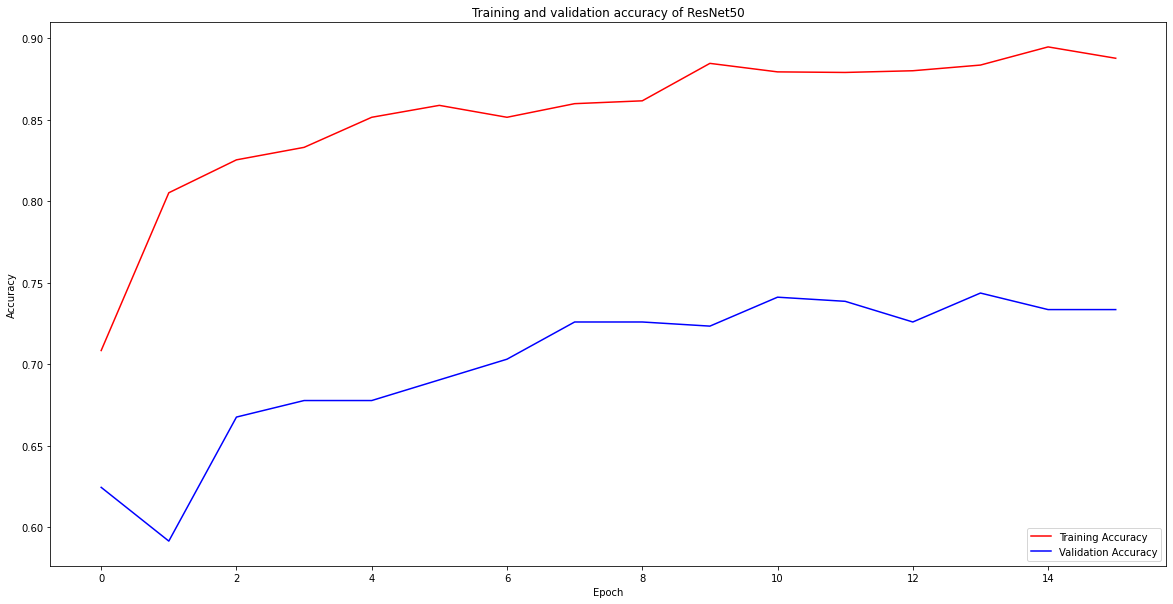

In [14]:
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy of ResNet50')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss of ResNet50')

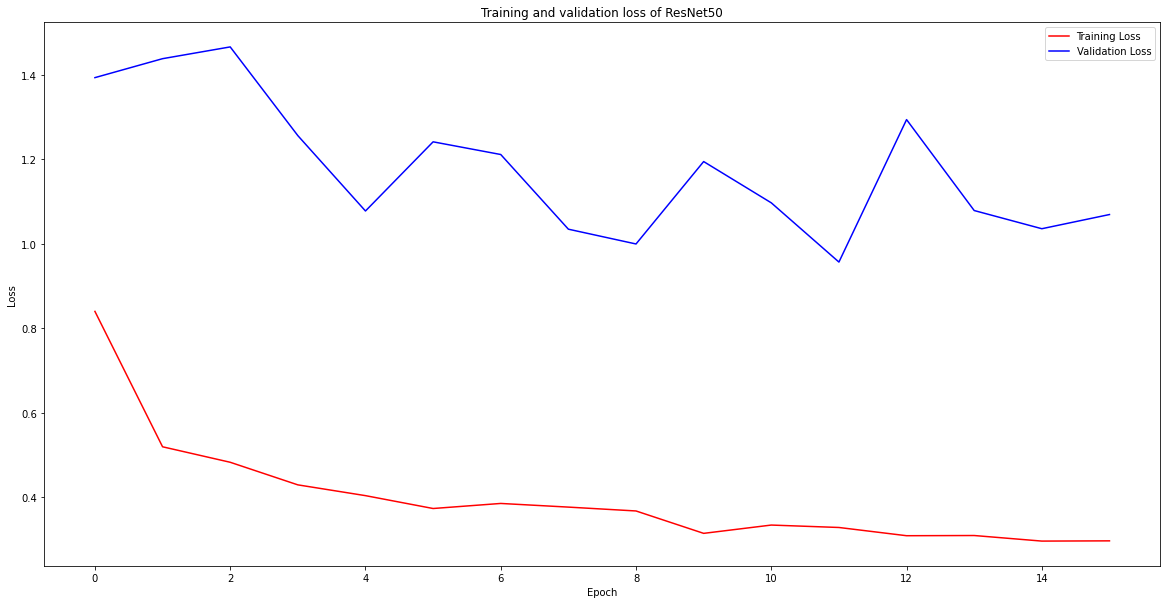

In [15]:
fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss of ResNet50')

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(122)

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label="Training")
plt.plot(epochs, val_acc, 'b', label="Validation")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Model accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label="Training")
plt.plot(epochs, val_loss, 'b', label="Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Model loss')

plt.show()